## Simple Sequential Model for Diabetes Data Classification

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
# Load the Diabetes dataset from Kaggle
url = r"C:\Users\krish\Downloads\data.csv"
column_names = ["id", "diagnosis", "radius_mean", "texture_mean", "perimeter_mean", "area_mean", "smoothness_mean", "compactness_mean", "concavity_mean", "concave points_mean", "symmetry_mean", "fractal_dimension_mean", "radius_se", "texture_se", "perimeter_se", "area_se", "smoothness_se", "compactness_se", "concavity_se", "concave points_se", "symmetry_se", "fractal_dimension_se", "radius_worst", "texture_worst", "perimeter_worst", "area_worst", "smoothness_worst", "compactness_worst", "concavity_worst", "concave points_worst", "symmetry_worst", "fractal_dimension_worst"]
data = pd.read_csv(url,skiprows=[0], names=column_names)
data = data.drop("id", axis=1)
data = data.drop("fractal_dimension_worst", axis=1)#read csv not reading a column properly , omitting for training
data['diagnosis'] = data['diagnosis'].replace({'M': 1, 'B': 0})

In [127]:
data.shape

(569, 30)

In [128]:
# Split data into features and target
X = data.drop("diagnosis", axis=1)
y = data["diagnosis"]

In [129]:
print(data.dtypes)  # Check data types of all columns
print(data.isnull().sum())  # Check for missing values

diagnosis                   int64
radius_mean               float64
texture_mean              float64
perimeter_mean            float64
area_mean                 float64
smoothness_mean           float64
compactness_mean          float64
concavity_mean            float64
concave points_mean       float64
symmetry_mean             float64
fractal_dimension_mean    float64
radius_se                 float64
texture_se                float64
perimeter_se              float64
area_se                   float64
smoothness_se             float64
compactness_se            float64
concavity_se              float64
concave points_se         float64
symmetry_se               float64
fractal_dimension_se      float64
radius_worst              float64
texture_worst             float64
perimeter_worst           float64
area_worst                float64
smoothness_worst          float64
compactness_worst         float64
concavity_worst           float64
concave points_worst      float64
symmetry_worst

In [130]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [131]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [132]:
# Build the Sequential model
model = keras.Sequential([
    layers.Input(shape=(29,)),  # Input layer with 8 features
    layers.Dense(64, activation='relu'),  # Hidden layer with 64 units and ReLU activation
    layers.Dropout(0.3),   # dropout to prevent overfitting
    layers.Dense(32, activation='relu'),  # Hidden layer with 32 units and ReLU activation
    layers.Dropout(0.3),   # dropout to prevent overfitting
    layers.Dense(1, activation='sigmoid')  # Output layer with 1 unit and sigmoid activation
])

In [133]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [134]:
# Train the model
history = model.fit(X_train_scaled, y_train, epochs=500, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/500
12/12 [==============================] - 1s 19ms/step - loss: 0.7296 - accuracy: 0.5577 - val_loss: 0.4474 - val_accuracy: 0.8022
Epoch 2/500
12/12 [==============================] - 0s 5ms/step - loss: 0.4405 - accuracy: 0.8132 - val_loss: 0.3024 - val_accuracy: 0.9121
Epoch 3/500
12/12 [==============================] - 0s 4ms/step - loss: 0.3186 - accuracy: 0.8819 - val_loss: 0.2295 - val_accuracy: 0.9451
Epoch 4/500
12/12 [==============================] - 0s 4ms/step - loss: 0.2544 - accuracy: 0.9258 - val_loss: 0.1862 - val_accuracy: 0.9670
Epoch 5/500
12/12 [==============================] - 0s 4ms/step - loss: 0.1774 - accuracy: 0.9423 - val_loss: 0.1607 - val_accuracy: 0.9670
Epoch 6/500
12/12 [==============================] - 0s 4ms/step - loss: 0.1551 - accuracy: 0.9588 - val_loss: 0.1427 - val_accuracy: 0.9670
Epoch 7/500
12/12 [==============================] - 0s 4ms/step - loss: 0.1356 - accuracy: 0.9698 - val_loss: 0.1298 - val_accuracy: 0.9670
Epoch 8/500


Epoch 59/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0227 - accuracy: 0.9918 - val_loss: 0.0790 - val_accuracy: 0.9780
Epoch 60/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0192 - accuracy: 0.9918 - val_loss: 0.0762 - val_accuracy: 0.9780
Epoch 61/500
12/12 [==============================] - 0s 4ms/step - loss: 0.0118 - accuracy: 1.0000 - val_loss: 0.0780 - val_accuracy: 0.9780
Epoch 62/500
12/12 [==============================] - 0s 4ms/step - loss: 0.0153 - accuracy: 0.9973 - val_loss: 0.0803 - val_accuracy: 0.9780
Epoch 63/500
12/12 [==============================] - 0s 3ms/step - loss: 0.0159 - accuracy: 0.9973 - val_loss: 0.0758 - val_accuracy: 0.9780
Epoch 64/500
12/12 [==============================] - 0s 3ms/step - loss: 0.0225 - accuracy: 0.9945 - val_loss: 0.0709 - val_accuracy: 0.9670
Epoch 65/500
12/12 [==============================] - 0s 3ms/step - loss: 0.0146 - accuracy: 0.9973 - val_loss: 0.0729 - val_accuracy: 0.9780
Epoch 

12/12 [==============================] - 0s 4ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.1516 - val_accuracy: 0.9560
Epoch 174/500
12/12 [==============================] - 0s 4ms/step - loss: 0.0086 - accuracy: 0.9973 - val_loss: 0.1125 - val_accuracy: 0.9670
Epoch 175/500
12/12 [==============================] - 0s 3ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.1083 - val_accuracy: 0.9670
Epoch 176/500
12/12 [==============================] - 0s 4ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.1056 - val_accuracy: 0.9670
Epoch 177/500
12/12 [==============================] - 0s 4ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.1024 - val_accuracy: 0.9670
Epoch 178/500
12/12 [==============================] - 0s 4ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.1065 - val_accuracy: 0.9670
Epoch 179/500
12/12 [==============================] - 0s 4ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.1098 - val_accuracy: 0.9670
Epoch 180/500

12/12 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.1911 - val_accuracy: 0.9560
Epoch 287/500
12/12 [==============================] - 0s 4ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.1923 - val_accuracy: 0.9560
Epoch 288/500
12/12 [==============================] - 0s 4ms/step - loss: 2.5809e-04 - accuracy: 1.0000 - val_loss: 0.1917 - val_accuracy: 0.9560
Epoch 289/500
12/12 [==============================] - 0s 4ms/step - loss: 2.7094e-04 - accuracy: 1.0000 - val_loss: 0.1925 - val_accuracy: 0.9560
Epoch 290/500
12/12 [==============================] - 0s 3ms/step - loss: 5.1712e-04 - accuracy: 1.0000 - val_loss: 0.1903 - val_accuracy: 0.9560
Epoch 291/500
12/12 [==============================] - 0s 4ms/step - loss: 4.8456e-04 - accuracy: 1.0000 - val_loss: 0.1880 - val_accuracy: 0.9560
Epoch 292/500
12/12 [==============================] - 0s 3ms/step - loss: 0.0053 - accuracy: 0.9973 - val_loss: 0.2667 - val_accuracy: 0.95

Epoch 398/500
12/12 [==============================] - 0s 5ms/step - loss: 1.5289e-04 - accuracy: 1.0000 - val_loss: 0.2843 - val_accuracy: 0.9560
Epoch 399/500
12/12 [==============================] - 0s 4ms/step - loss: 2.0635e-04 - accuracy: 1.0000 - val_loss: 0.2811 - val_accuracy: 0.9560
Epoch 400/500
12/12 [==============================] - 0s 4ms/step - loss: 4.9481e-04 - accuracy: 1.0000 - val_loss: 0.2864 - val_accuracy: 0.9560
Epoch 401/500
12/12 [==============================] - 0s 5ms/step - loss: 1.0191e-04 - accuracy: 1.0000 - val_loss: 0.2943 - val_accuracy: 0.9560
Epoch 402/500
12/12 [==============================] - 0s 5ms/step - loss: 7.7482e-05 - accuracy: 1.0000 - val_loss: 0.2924 - val_accuracy: 0.9560
Epoch 403/500
12/12 [==============================] - 0s 4ms/step - loss: 2.8725e-04 - accuracy: 1.0000 - val_loss: 0.2914 - val_accuracy: 0.9560
Epoch 404/500
12/12 [==============================] - 0s 4ms/step - loss: 1.4069e-04 - accuracy: 1.0000 - val_loss: 0

Epoch 454/500
12/12 [==============================] - 0s 3ms/step - loss: 9.5261e-04 - accuracy: 1.0000 - val_loss: 0.3029 - val_accuracy: 0.9560
Epoch 455/500
12/12 [==============================] - 0s 4ms/step - loss: 1.2692e-04 - accuracy: 1.0000 - val_loss: 0.3039 - val_accuracy: 0.9670
Epoch 456/500
12/12 [==============================] - 0s 4ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.3140 - val_accuracy: 0.9560
Epoch 457/500
12/12 [==============================] - 0s 3ms/step - loss: 6.6401e-04 - accuracy: 1.0000 - val_loss: 0.3295 - val_accuracy: 0.9560
Epoch 458/500
12/12 [==============================] - 0s 4ms/step - loss: 0.0064 - accuracy: 0.9973 - val_loss: 0.2945 - val_accuracy: 0.9670
Epoch 459/500
12/12 [==============================] - 0s 4ms/step - loss: 1.2345e-04 - accuracy: 1.0000 - val_loss: 0.2944 - val_accuracy: 0.9670
Epoch 460/500
12/12 [==============================] - 0s 3ms/step - loss: 4.9048e-04 - accuracy: 1.0000 - val_loss: 0.2682 - 

In [135]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test_scaled, y_test)
print(f"Test accuracy: {test_acc:.4f}")

4/4 [==============================] - 0s 2ms/step - loss: 0.2735 - accuracy: 0.9737
Test accuracy: 0.9737


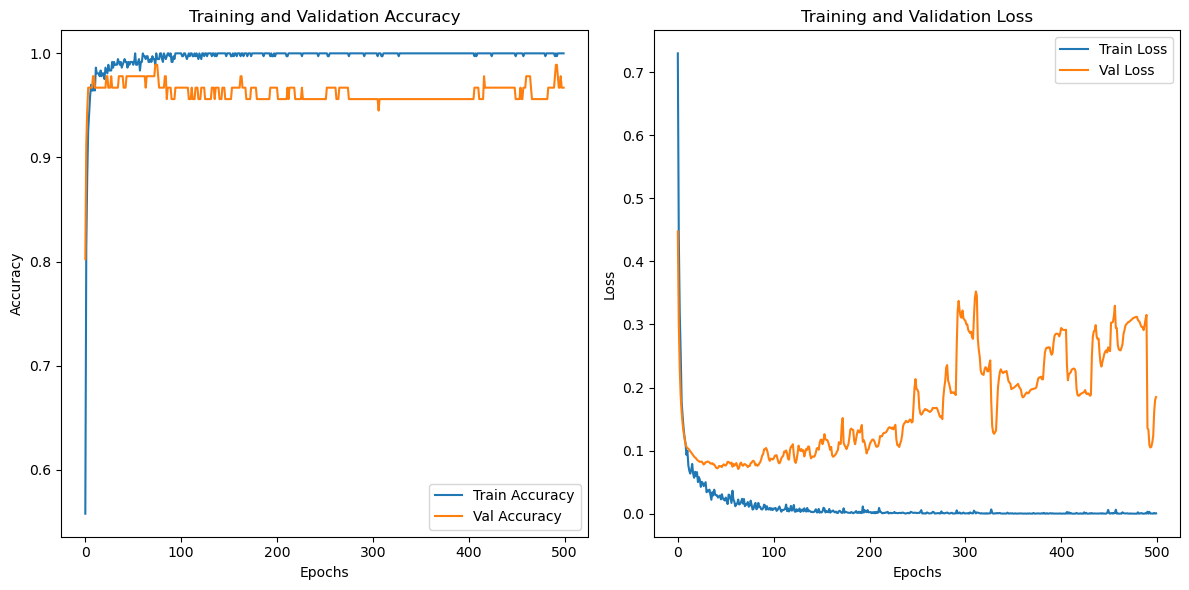

In [136]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()